In [23]:
from open_ecos_reader import ECOSReader as ECOSReader
import pandas as pd
import numpy as np


In [24]:
import matplotlib.font_manager as fm

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

In [25]:
import matplotlib
import matplotlib.font_manager as fm
from matplotlib import rcParams


# 한글폰트 설치
rcParams['figure.figsize'] = 25, 16


In [26]:
# plt.rcParams['font.family'] = 'KakaoBold'


In [27]:
api_key = 'sample'

In [28]:
er = ECOSReader(api_key)

In [29]:
[i for i in dir(er) if '__' not in i]

['_api_call',
 'apikey',
 'key_statistic_list',
 'language',
 'satatistic_list',
 'statistic_item_list',
 'statistic_meta',
 'statistic_search',
 'statistic_word',
 'warning']

In [30]:
key_statistic_list = er.key_statistic_list()

## 100대 금리의 클래스 조회하기

In [31]:
key_statistic_list['CLASS_NAME'].drop_duplicates()

0           시장금리
8          여수신금리
10        예금/대출금
14           통화량
18            환율
22            주식
26            채권
28           성장률
33            소득
35      GDP대비 비율
38            생산
45            소비
48            투자
55        경기순환지표
57          심리지표
60        기업경영지표
63            가계
65        소득분배지표
67            고용
71            노동
74            인구
77          국제수지
82         통관수출입
86       대외채권/채무
89    소비자/생산자 물가
93        수출입 물가
95        부동산 가격
98           원자재
Name: CLASS_NAME, dtype: object

In [32]:
key_statistic_list[key_statistic_list['CLASS_NAME'] == '시장금리']

,CLASS_NAME,KEYSTAT_NAME,DATA_VALUE,CYCLE,UNIT_NAME
0,시장금리,한국은행 기준금리,2.25,20220822,%
1,시장금리,콜금리(익일물),2.214,20220823,%
2,시장금리,KORIBOR(3개월),2.71,20220824,%
3,시장금리,CD수익률(91일),2.76,20220824,%
4,시장금리,통안증권수익률(364일),3.038,20220824,%
5,시장금리,국고채수익률(3년),3.311,20220824,%
6,시장금리,국고채수익률(5년),3.39,20220824,%
7,시장금리,"회사채수익률(3년,AA-)",4.298,20220824,%


In [33]:
satatistic_list = er.satatistic_list()

In [34]:
satatistic_list[satatistic_list['STAT_NAME'].apply(lambda x: '한국은행 기준금리' in x)]

,P_STAT_CODE,STAT_CODE,STAT_NAME,CYCLE,SRCH_YN,ORG_NAME
100,0000000048,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,D,Y,한국은행


In [35]:
interest_df = er.statistic_search('722Y001', 'D', '20220101', '20220824')

In [36]:
interest_df.head()

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,TIME,DATA_VALUE
0,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0101000,한국은행 기준금리,None,None,None,None,None,None,연%,20220101,1
1,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0101000,한국은행 기준금리,None,None,None,None,None,None,연%,20220102,1
2,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0101000,한국은행 기준금리,None,None,None,None,None,None,연%,20220103,1
3,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0101000,한국은행 기준금리,None,None,None,None,None,None,연%,20220104,1
4,722Y001,1.3.1. 한국은행 기준금리 및 여수신금리,0101000,한국은행 기준금리,None,None,None,None,None,None,연%,20220105,1


In [37]:
interest_df['date_id'] = pd.to_datetime(interest_df['TIME'])
interest_df['DATA_VALUE'] = interest_df['DATA_VALUE'].astype(float)

<AxesSubplot:xlabel='date_id'>

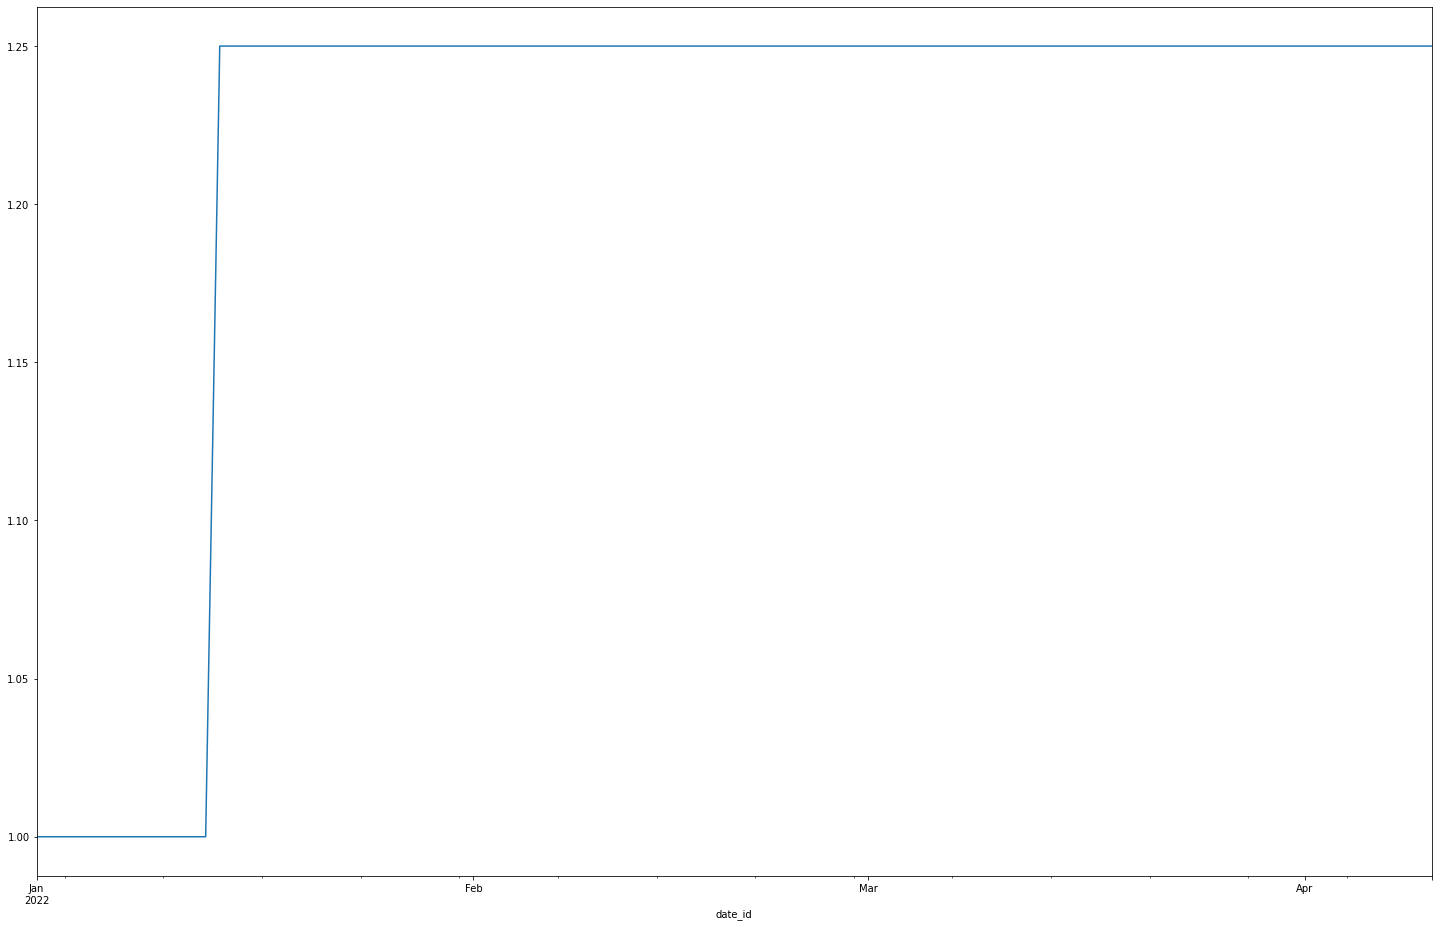

In [38]:
interest_df.set_index('date_id')['DATA_VALUE'].plot()

In [39]:
key_statistic_list[key_statistic_list['CLASS_NAME'] == '여수신금리']

,CLASS_NAME,KEYSTAT_NAME,DATA_VALUE,CYCLE,UNIT_NAME
8,여수신금리,예금은행 수신금리,2.41,202206,%
9,여수신금리,예금은행 대출금리,3.9,202206,%


In [40]:
satatistic_list[satatistic_list['STAT_NAME'].apply(lambda x: '예금은행 대출금리' in x)]

,P_STAT_CODE,STAT_CODE,STAT_NAME,CYCLE,SRCH_YN,ORG_NAME
109,0000000055,121Y006,1.3.3.2.1. 예금은행 대출금리(신규취급액 기준),M,Y,한국은행
110,0000000055,121Y015,1.3.3.2.2. 예금은행 대출금리(잔액 기준),M,Y,한국은행


In [41]:
interest_df = er.statistic_search('121Y006', 'M', '202201', '202208')

In [42]:
interest_df.head()

,STAT_CODE,STAT_NAME,ITEM_CODE1,ITEM_NAME1,ITEM_CODE2,ITEM_NAME2,ITEM_CODE3,ITEM_NAME3,ITEM_CODE4,ITEM_NAME4,UNIT_NAME,TIME,DATA_VALUE
0,121Y006,1.3.3.2.1. 예금은행 대출금리(신규취급액 기준),BECBLA01,대출평균 1),None,None,None,None,None,None,연%,202201,3.45
1,121Y006,1.3.3.2.1. 예금은행 대출금리(신규취급액 기준),BECBLA04,공공및기타부문대출,None,None,None,None,None,None,연리%,202201,2.6
2,121Y006,1.3.3.2.1. 예금은행 대출금리(신규취급액 기준),BECBLB01,총대출 1),None,None,None,None,None,None,연리%,202201,3.12
3,121Y006,1.3.3.2.1. 예금은행 대출금리(신규취급액 기준),BECBLA07,기업일반자금대출,None,None,None,None,None,None,연리%,202201,3.3
4,121Y006,1.3.3.2.1. 예금은행 대출금리(신규취급액 기준),BECBLA05,상업어음할인,None,None,None,None,None,None,연리%,202201,4.42


In [43]:
interest_df['date_id'] = pd.to_datetime(interest_df['TIME'] + '01')
interest_df['DATA_VALUE'] = interest_df['DATA_VALUE'].astype(float)

<AxesSubplot:xlabel='date_id'>

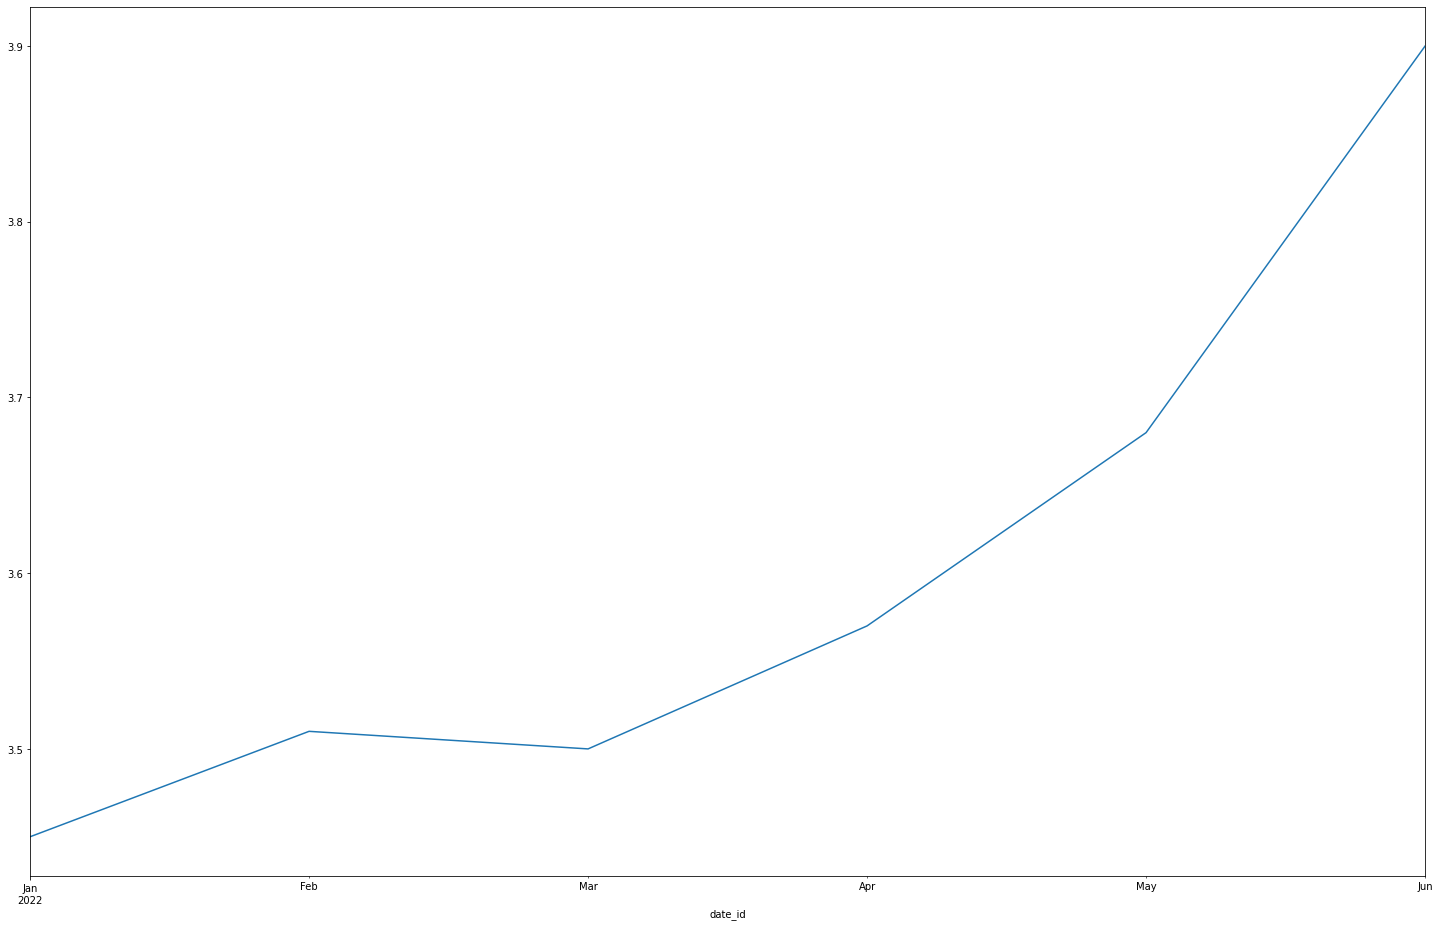

In [44]:
interest_df[interest_df['ITEM_NAME1'] == '대출평균 1)'].set_index('date_id')['DATA_VALUE'].plot()